## Regression Practice by using Python Scikit-learn

Doudou Zhang

In [1]:
# Regression Boston Housing Data Example -- https://archive.ics.uci.edu/ml/datasets/Housing
import pandas as pd

file_ = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'  # shape = (506, 14)
df = pd.read_csv(file_, 
                 header = None, 
                 sep='\s+')

print(df.shape)

(506, 14)


In [2]:
# Label the columns
df.columns = ['CRIM','ZN','INDUS','CHAS',
             'NOX','RM','AGE','DIS','RAD',
             'TAX','PTRATIO','B','LSTAT','MEDV']

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


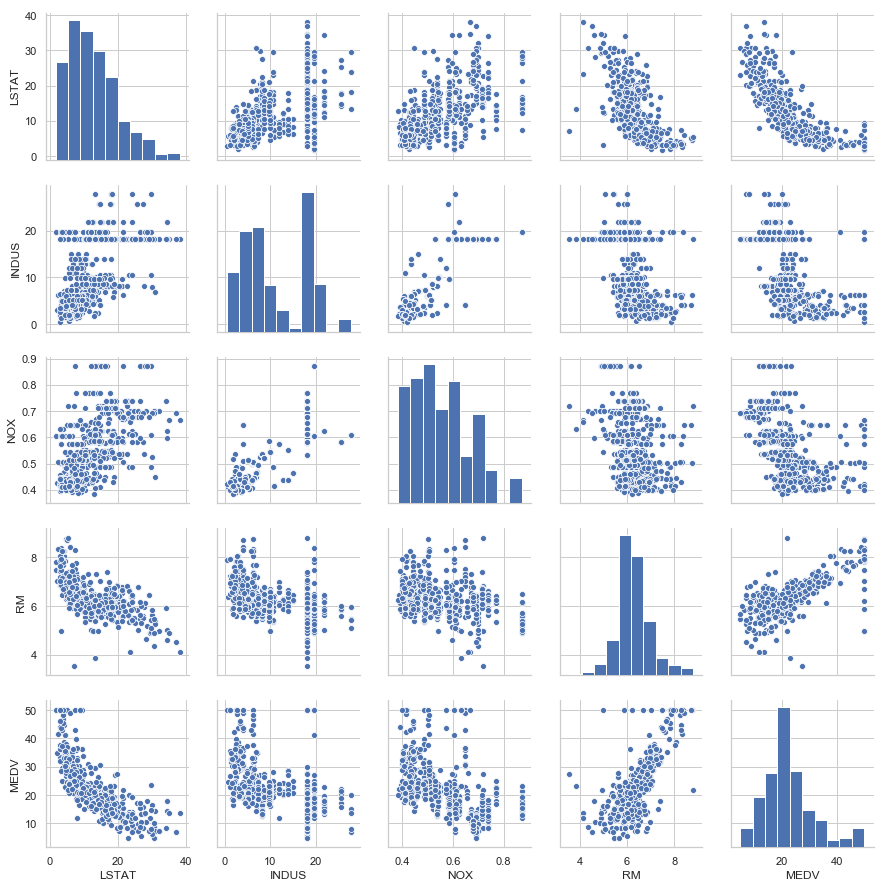

In [5]:
# Visualizing the data via Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style = 'whitegrid', context = 'notebook')

cols = ['LSTAT','INDUS','NOX','RM','MEDV']

sns.pairplot(df[cols], size = 2.5)
plt.show()

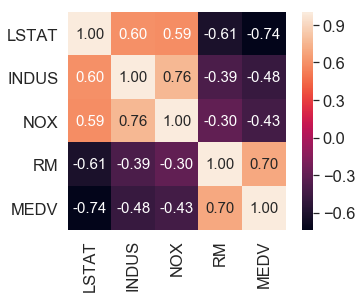

In [7]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale= 1.5)
hm = sns.heatmap(cm, 
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

In [8]:
# Implementing OLS w/ gradient descent, OLS linear regression interpreted as Adaline without the unit step function
# so to obtain a continous target values instead of -1 or 1. pg. 285.

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [9]:
# Specify your X and y 



######## HWK5 - practice # uncomment this and take it through the analysis
X = df[['LSTAT']].values # don't forget to make this an 2D array
y = df['MEDV'].values
######## HWK5 # uncomment this and take it through the analysis

######## Stretch HWK5 : Find, create, and loop thru as many Supervised Learning Regression Algos
########                similar to the prior loops of Supervised Learning Classification Algos
########                Send Jupyter Notebook and CV to kliew1@jhu.edu 

In [10]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


In [11]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)



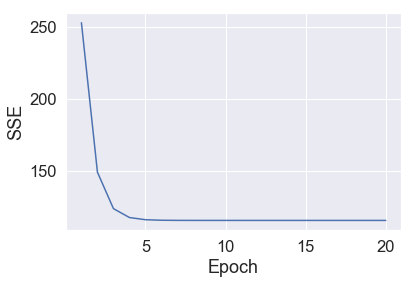

In [12]:
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [13]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red')
    return None


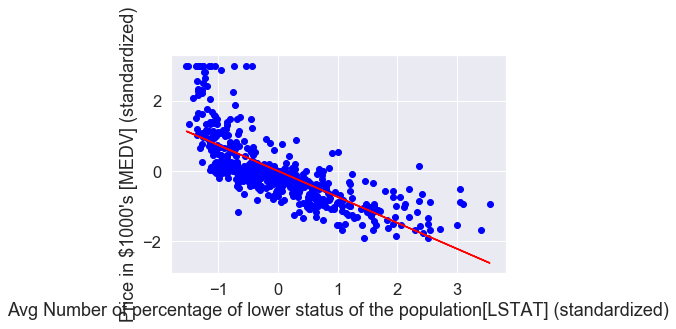

In [14]:
lin_regplot(X_std, y_std, lr) 
plt.xlabel('Avg Number of percentage of lower status of the population[LSTAT] (standardized)')

plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

In [15]:
# Let's predict the prices of the house with 5 rooms
num_rooms_std = sc_x.transform([[5.0]])

price_std = lr.predict(num_rooms_std)
#print(num_rooms_std, price_std)
print('Print in $1000\'s: %.3f' % (sc_y.inverse_transform(price_std)))

Print in $1000's: 29.804


In [16]:
# Look at the slope and intercept
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: -0.738
Intercept: -0.000


# Now let's use sklearn's package, note there's not standardization here

In [17]:
# 
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: -0.950
Intercept: 34.554


In [18]:
# Close form solution for OLS w = (X'X)^(-1)(X'y)
# Don't forget to add a column vector of "ones" for the intercept!
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb)) # (X'X)^(-1)
w = np.dot(z, np.dot(Xb.T, y))      # (X'X)^(-1)(X'y)

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: -0.950
Intercept: 34.554


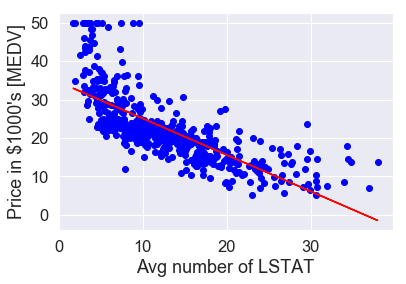

In [20]:
lin_regplot(X, y, slr)
plt.xlabel('Avg number of LSTAT')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

## Fitting a Robust Regression model using RANSAC

In [0]:
# Algorithm
# 1. select random number of inliers, and fit model
# 2. test all data against fitted model, add those points that
#    fall within tolerance limit
# 3. Refit the model using all inliers
# 4. Estimate the error of the fitted model vs inliers
# 5. Terminate or repeat from 1.
#    Terminate if performance meets user-defined threhold or # of iterations have been reached

In [21]:
# p.291, slight change due to more recent version of 
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                             max_trials=100, 
                             min_samples=50, 
                             loss='absolute_loss', 
                             residual_threshold=5.0, 
                             random_state=0)
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

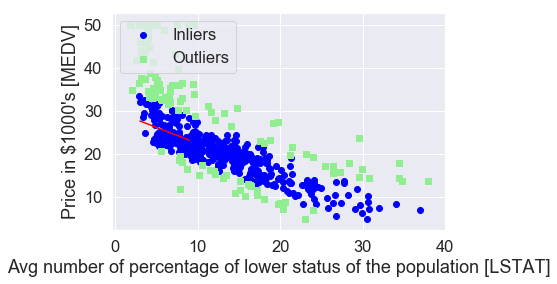

In [22]:
inlier_mask  = ransac.inlier_mask_ # boolean variable identifying 'inlier' 
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis]) 

plt.scatter(X[inlier_mask], y[inlier_mask], 
           c='blue', marker='o', label='Inliers')

plt.scatter(X[outlier_mask], y[outlier_mask], 
           c='lightgreen', marker='s', label='Outliers')

plt.plot(line_X, line_y_ransac, color = 'red' )
plt.xlabel('Avg number of percentage of lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.show()

In [23]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)


Slope: -0.746
Intercept: 29.882


## Evaluting the performance of linear regression model

In [24]:
# p. 294
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values # excluding y
y = df['MEDV'].values

In [25]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=.3, random_state=0)

In [26]:
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

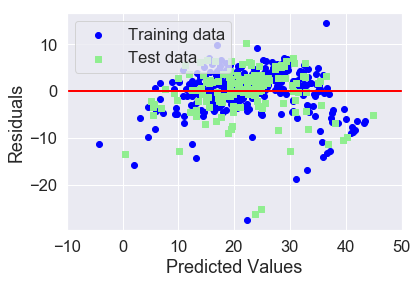

In [28]:
# Plotting residuals
plt.scatter(y_train_pred, y_train_pred-y_train,
           c='blue', marker='o', label='Training data')

plt.scatter(y_test_pred, y_test_pred-y_test,
           c='lightgreen', marker='s', label='Test data')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')

plt.hlines(y=0, xmin = -10, xmax = 50, lw=2, color='red')
plt.xlim([-10,50])
plt.show()

In [29]:
# Mean=Squared-Error - measure's model performance
from sklearn.metrics import mean_squared_error
print('MSE Train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test,  y_test_pred)) )

MSE Train: 19.958, test: 27.196


In [30]:
# R2 -- coefficient of determination measures the fraction of the response variance that is captured by the model
# R2 = 1 - (SSE/SST) 
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), 
                                       r2_score(y_test , y_test_pred))  )

R^2 train: 0.765, test: 0.673


## Using Regularized Methods for Regressions


In [31]:
# Review, Ridge Regression (L2), LASSO Regression (L1), and Elastic Net Regression (both L1 & L2)
#np.set_printoptions(precision=3)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0) # if alpha = 0, get back to OLS

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0) # if alpha = 0, get OLS

from sklearn.linear_model import ElasticNet
enet  = ElasticNet(alpha = 1.0, l1_ratio = 0.5)


In [32]:
### Note that ridge, lasso, and enet goes to OLS with zero-out parameters
print('OLS weights         :',slr.fit(X,y).coef_)

ridge = Ridge(alpha = 0)
print('\nRidge with alpha=0  :', ridge.fit(X,y).coef_)

lasso = Lasso(alpha = 0)
print('\nLasso with alpha=0  :', ridge.fit(X,y).coef_)

enet  = ElasticNet(alpha = 0, l1_ratio = 1)

print('\nElastic Net         : ',enet.fit(X,y).coef_)

# Elastic Net = 1 / (2 * n_samples) * ||y - Xw||^2_2 
#               + alpha * l1_ratio * ||w||_1  
#               + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2


OLS weights         : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

Ridge with alpha=0  : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

Lasso with alpha=0  : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

Elastic Net         :  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Turning a Linear Regression Model into a curve -- Polynomial Regression

In [32]:
# pg. 298-299
# Add 2nd degree polynomial term
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258., 270., 294.,
              320., 342., 368.,
              396., 446., 480., 
              586.])[:, np.newaxis]
print(X.shape)

(10, 1)


In [33]:
y = np.array([236.4, 234.4, 252.8, 
              289.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])
print(y.shape)

(10,)


In [34]:
lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree = 2) # PolyFeatures take x, gives back [1's, x, x^2]
X_quad = quadratic.fit_transform(X)     # if you had [1's, x1, x2] then polynomialfeatures will give cross-terms too.

print(X_quad.shape)
print(X_quad)

(10, 3)
[[1.00000e+00 2.58000e+02 6.65640e+04]
 [1.00000e+00 2.70000e+02 7.29000e+04]
 [1.00000e+00 2.94000e+02 8.64360e+04]
 [1.00000e+00 3.20000e+02 1.02400e+05]
 [1.00000e+00 3.42000e+02 1.16964e+05]
 [1.00000e+00 3.68000e+02 1.35424e+05]
 [1.00000e+00 3.96000e+02 1.56816e+05]
 [1.00000e+00 4.46000e+02 1.98916e+05]
 [1.00000e+00 4.80000e+02 2.30400e+05]
 [1.00000e+00 5.86000e+02 3.43396e+05]]


In [35]:
simple_x = np.array([1,2,3])[:, np.newaxis]

print(simple_x)
print(quadratic.fit_transform(simple_x))


[[1]
 [2]
 [3]]
[[1. 1. 1.]
 [1. 2. 4.]
 [1. 3. 9.]]


In [36]:
# Fit a simple linear model for comparison
lr.fit(X,y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

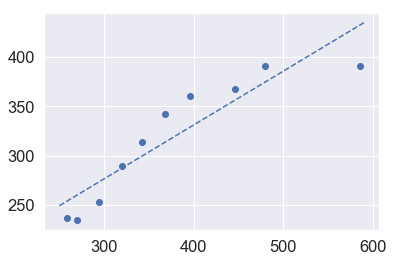

In [37]:
# Fit multiple regression on transformed features for polynomial regression
pr.fit(X_quad, y) #(10,3), (10,1)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# Plot results:
plt.scatter(X, y, label= 'training points')
plt.plot(X_fit, y_lin_fit,
        label = 'linear fit', linestyle='--')


plt.show()

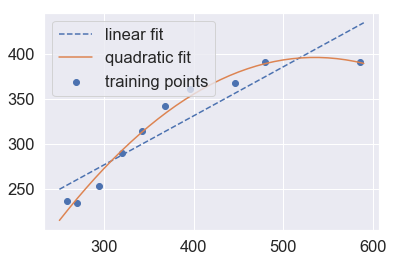

In [38]:
# Plot results:
plt.scatter(X, y, label= 'training points')

plt.plot(X_fit, y_lin_fit,
        label = 'linear fit', linestyle='--')

plt.plot(X_fit, y_quad_fit,
        label = 'quadratic fit')

plt.legend(loc='upper left')

plt.show()

In [39]:
# Compare MSE
y_lin_pred  = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (
    mean_squared_error(y, y_lin_pred),
    mean_squared_error(y, y_quad_pred)))

Training MSE linear: 558.956, quadratic: 60.047


In [40]:
print('Training R^2 linear: %.3f, quadratic: %.3f' % ( 
    r2_score(y, y_lin_pred),
    r2_score(y, y_quad_pred)))

Training R^2 linear: 0.837, quadratic: 0.982


In [41]:
## Modeling NonLinear Relationships in the Housing Dataset, use 2nd degree and 3rd degree polynomials

X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create polynomial features
quadratic = PolynomialFeatures(degree = 2)
X_quad  = quadratic.fit_transform(X)

cubic     = PolynomialFeatures(degree = 3)
X_cubic = cubic.fit_transform(X)

print(X_quad.shape, X_cubic.shape)

(506, 3) (506, 4)


In [42]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

# Linear Fit
regr  = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# Quadratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# Cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


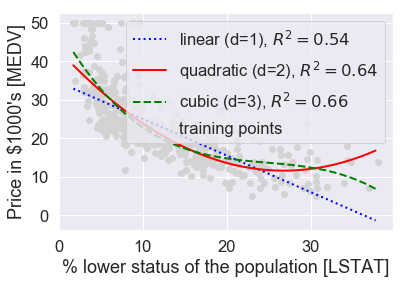

In [43]:
# plot results
plt.scatter(X, y,
           label = 'training points',
           color = 'lightgray')

plt.plot(X_fit, y_lin_fit,
        label = 'linear (d=1), $R^2=%.2f$' % linear_r2,
        color = 'blue',
        lw = 2,
        linestyle = ':')

plt.plot(X_fit, y_quad_fit,
        label = 'quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
        color = 'red',
        lw = 2,
        linestyle = '-')

plt.plot(X_fit, y_cubic_fit,
        label = 'cubic (d=3), $R^2=%.2f$' % cubic_r2,
        color = 'green',
        lw = 2,
        linestyle = '--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc = 'upper right')

plt.show()

In [44]:
# Try a log transform of LSTAT and square root of MEDV
X_log = np.log(X)
y_sqrt = np.sqrt(y)

X_fit = np.arange(X_log.min()-1, 
                  X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt) 
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))


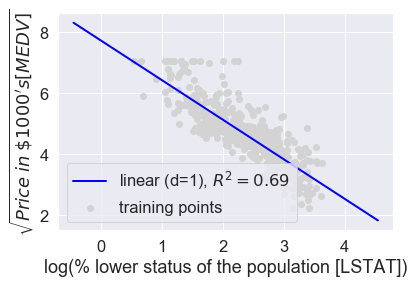

In [45]:
# plot results
plt.scatter(X_log, y_sqrt,
           label = 'training points',
           color = 'lightgray')

plt.plot(X_fit, y_lin_fit,
        label = 'linear (d=1), $R^2=%.2f$' % linear_r2, 
        color = 'blue',
        lw = 2 )

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()


## Decision Tree Regression and Random Forest Regression

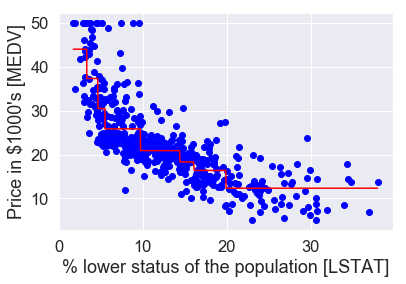

In [46]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth = 3) # Try different max_depths = 1, 3, 10, 300
tree.fit(X,y)
sort_idx = X.flatten().argsort() # X into 1-D, then give index value of sorted 1-D X, increasing order
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')

plt.show()

In [47]:
## Random Forest Regression - ensemble of multiple decision tree regressions

X = df.iloc[:, :-1].values # input X data
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size = 0.4,
            random_state = 1)



In [48]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
                    n_estimators = 1000,
                    criterion = 'mse',
                    random_state = 1,
                    n_jobs = -1)

In [49]:
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred  = forest.predict(X_test) 


In [50]:
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test,  y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test,  y_test_pred) ) )

# RF tends to overfit the training data

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


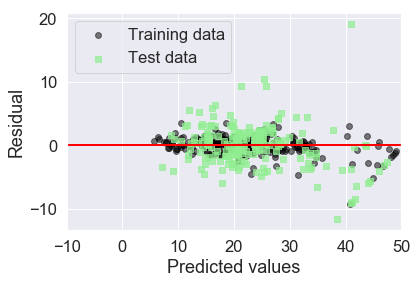

In [52]:
# Looking at the residuals behavior
plt.scatter(y_train_pred, y_train_pred - y_train,
           c = 'black',
           marker = 'o',
           s = 35,
           alpha = 0.5,
           label = 'Training data')

plt.scatter(y_test_pred, y_test_pred - y_test,
           c = 'lightgreen',
           marker = 's',
           s = 35,
           alpha = 0.7,
           label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin=-10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])

plt.show()

# residual plot reveals possible heteroscedasticity!

In [0]:
file_ = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'  # shape = (506, 14)
df = pd.read_csv(file_, 
                 header = None, 
                 sep='\s+')

In [55]:
type(df)

pandas.core.frame.DataFrame

In [0]:
x = [1,2,3,4]

In [61]:
type(x[0]), type(df[0]), type(df[0:3])

(int, pandas.core.series.Series, pandas.core.frame.DataFrame)

In [64]:
df[0].head()

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: 0, dtype: float64